In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df=pd.read_csv('/content/covid_19_clean_complete.csv',parse_dates=True)
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [ ]:
# changing columns names for comfortable purpose
df.rename(columns={"Date":"date",
                   "Province/State":"state",
                   "Country/Region":"country",
                   "Lat":"lat","Long":"long",
                   "Confirmed":"confirmed",
                   "Deaths":"deaths",
                   "Recovered":"recovered"
                   },inplace = True)

In [ ]:
df

,state,country,lat,long,date,confirmed,deaths,recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [ ]:
df["active"]=df['confirmed']-df['recovered']-df['deaths']
# This will check if there are any incorrect values in the active column and it automatically correct them.

In [ ]:
df["active"]

In [1]:
# Visually  analysing the trends

In [ ]:
df['date'].max()

'2020-07-27'

In [ ]:
#countries having most active cases in any particular date
recent_day=df[df['date']=='2020-07-27']
recent_day

,state,country,lat,long,date,confirmed,deaths,recovered,Active,WHO Region,active
48807,NaN,Afghanistan,33.939110,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean,9796
48808,NaN,Albania,41.153300,20.168300,2020-07-27,4880,144,2745,1991,Europe,1991
48809,NaN,Algeria,28.033900,1.659600,2020-07-27,27973,1163,18837,7973,Africa,7973
48810,NaN,Andorra,42.506300,1.521800,2020-07-27,907,52,803,52,Europe,52
48811,NaN,Angola,-11.202700,17.873900,2020-07-27,950,41,242,667,Africa,667
...,...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa,117
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean,375
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa,19
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe,1147


In [ ]:
total_world = recent_day.groupby('country')['confirmed','recovered','deaths','active'].sum().reset_index()
total_world

<ipython-input-17-a3fbc1861092>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  total_world = recent_day.groupby('country')['confirmed','recovered','deaths','active'].sum().reset_index()


,country,confirmed,recovered,deaths,active
0,Afghanistan,36263,25198,1269,9796
1,Albania,4880,2745,144,1991
2,Algeria,27973,18837,1163,7973
3,Andorra,907,803,52,52
4,Angola,950,242,41,667
...,...,...,...,...,...
182,West Bank and Gaza,10621,3752,78,6791
183,Western Sahara,10,8,1,1
184,Yemen,1691,833,483,375
185,Zambia,4552,2815,140,1597


In [ ]:
# plotting choropleth plot for countries with active cases.
choroplot = px.choropleth(total_world,locations="country",
                       locationmode = "country names", color="active",
                       hover_name="country",range_color=[1,10000],
                       color_continuous_scale="blues",
                       title="Countries with Active Cases")
choroplot.show()

In [ ]:
# plotting choropleth plot for countries with confirmed cases.
choroplot = px.choropleth(total_world,locations="country",
                       locationmode = "country names", color="confirmed",
                       hover_name="country",range_color=[1,10000],
                       color_continuous_scale="blues",
                       title="Countries with confirmed Cases")
choroplot.show()

In [ ]:
# plotting choropleth plot for countries with recovered cases.
choroplot = px.choropleth(total_world,locations="country",
                       locationmode = "country names", color="recovered",
                       hover_name="country",range_color=[1,10000],
                       color_continuous_scale="blues",
                       title="Countries with recovered Cases")
choroplot.show()

In [ ]:
# plotting choropleth plot for countries with deaths cases.
choroplot = px.choropleth(total_world,locations="country",
                       locationmode = "country names", color="deaths",
                       hover_name="country",range_color=[1,10000],
                       color_continuous_scale="blues",
                       title="Countries with deaths Cases")
choroplot.show()

<ipython-input-22-b0d12d16bbba>:8: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

<ipython-input-22-b0d12d16bbba>:8: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



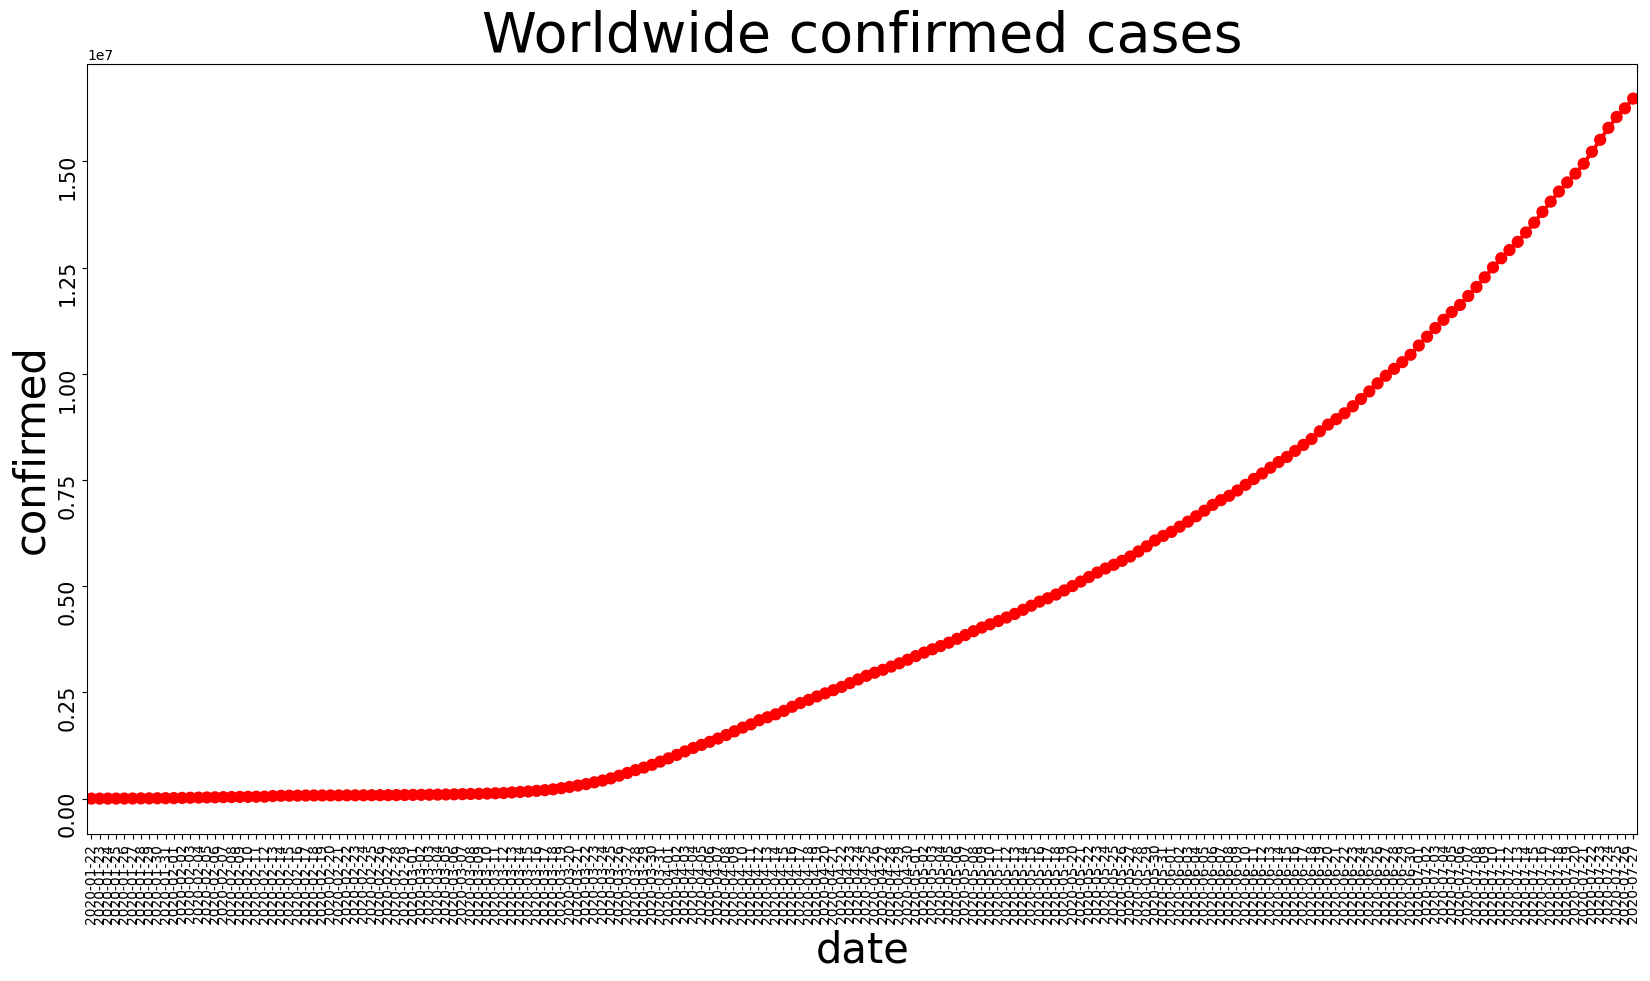

In [ ]:
# Trend how covid spread
plt.figure(figsize=(20,10))
plt.xticks(rotation=90,fontsize=10)
plt.yticks(rotation=90,fontsize=15)
plt.xlabel('Dates',fontsize=30)
plt.ylabel('Total cases',fontsize=30)
plt.title('Worldwide confirmed cases',fontsize=40)
total_cases = df.groupby("date")['date','confirmed'].sum().reset_index()
total_cases['date']=pd.to_datetime(total_cases['date'])

x=sns.pointplot(x=total_cases.date.dt.date,y=total_cases.confirmed,color='r')
x.set(xlabel="Dates",ylabel="Total cases")

<ipython-input-23-08b51de219c0>:7: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

<ipython-input-23-08b51de219c0>:7: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



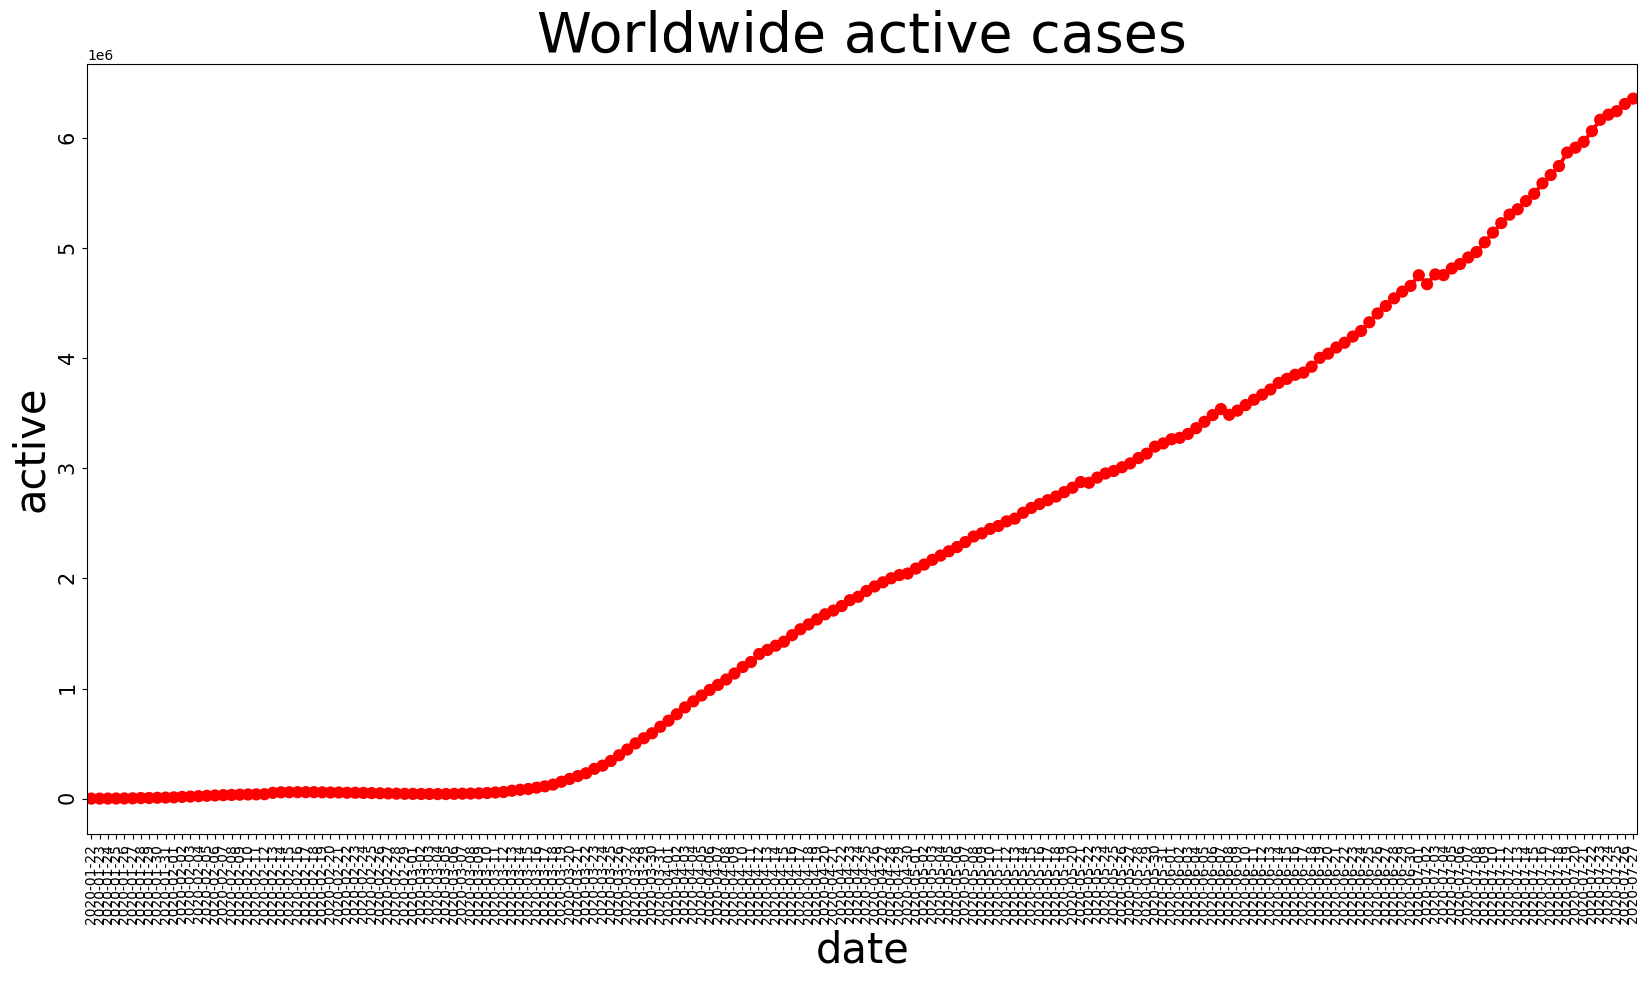

In [ ]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90,fontsize=10)
plt.yticks(rotation=90,fontsize=15)
plt.xlabel('Dates',fontsize=30)
plt.ylabel('Total cases',fontsize=30)
plt.title('Worldwide active cases',fontsize=40)
total_cases = df.groupby("date")['date','active'].sum().reset_index()
total_cases['date']=pd.to_datetime(total_cases['date'])

x=sns.pointplot(x=total_cases.date.dt.date,y=total_cases.active,color='r')
x.set(xlabel="Dates",ylabel="Total cases")

<ipython-input-24-bd23ecfe1fe1>:7: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

<ipython-input-24-bd23ecfe1fe1>:7: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



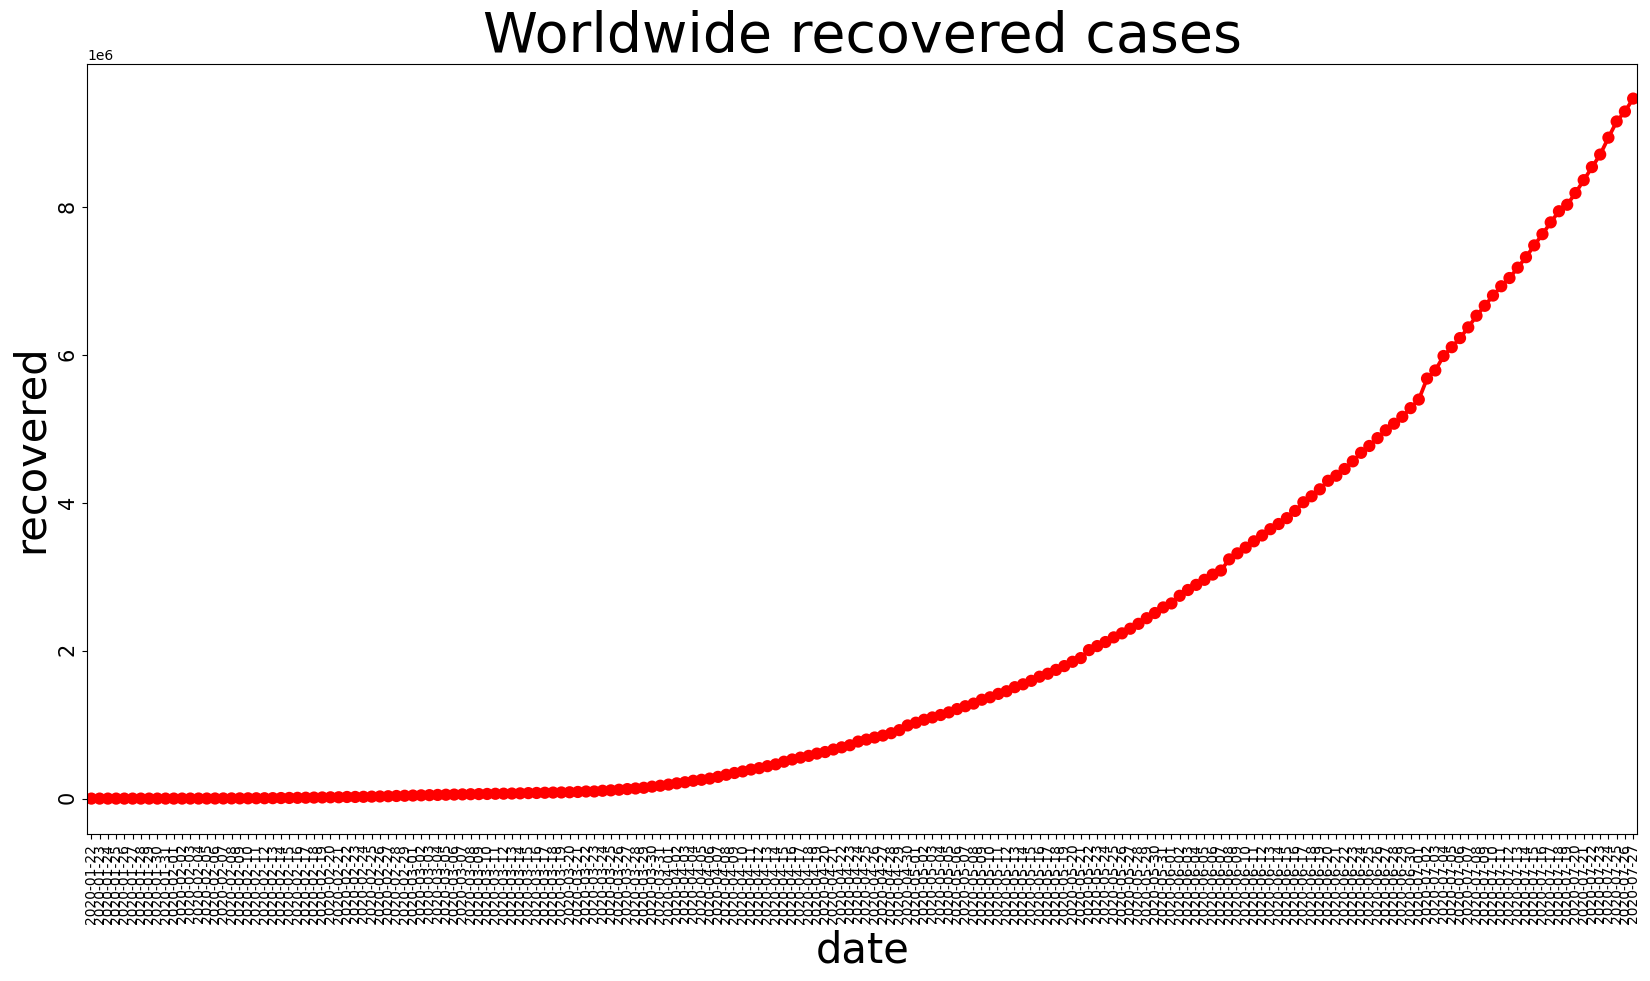

In [ ]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90,fontsize=10)
plt.yticks(rotation=90,fontsize=15)
plt.xlabel('Dates',fontsize=30)
plt.ylabel('Total cases',fontsize=30)
plt.title('Worldwide recovered cases',fontsize=40)
total_cases = df.groupby("date")['date','recovered'].sum().reset_index()
total_cases['date']=pd.to_datetime(total_cases['date'])

x=sns.pointplot(x=total_cases.date.dt.date,y=total_cases.recovered,color='r')
x.set(xlabel="Dates",ylabel="Total cases")

In [2]:
# Visuals with recover and death cases

<ipython-input-25-a102ce72c0d9>:7: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

<ipython-input-25-a102ce72c0d9>:7: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



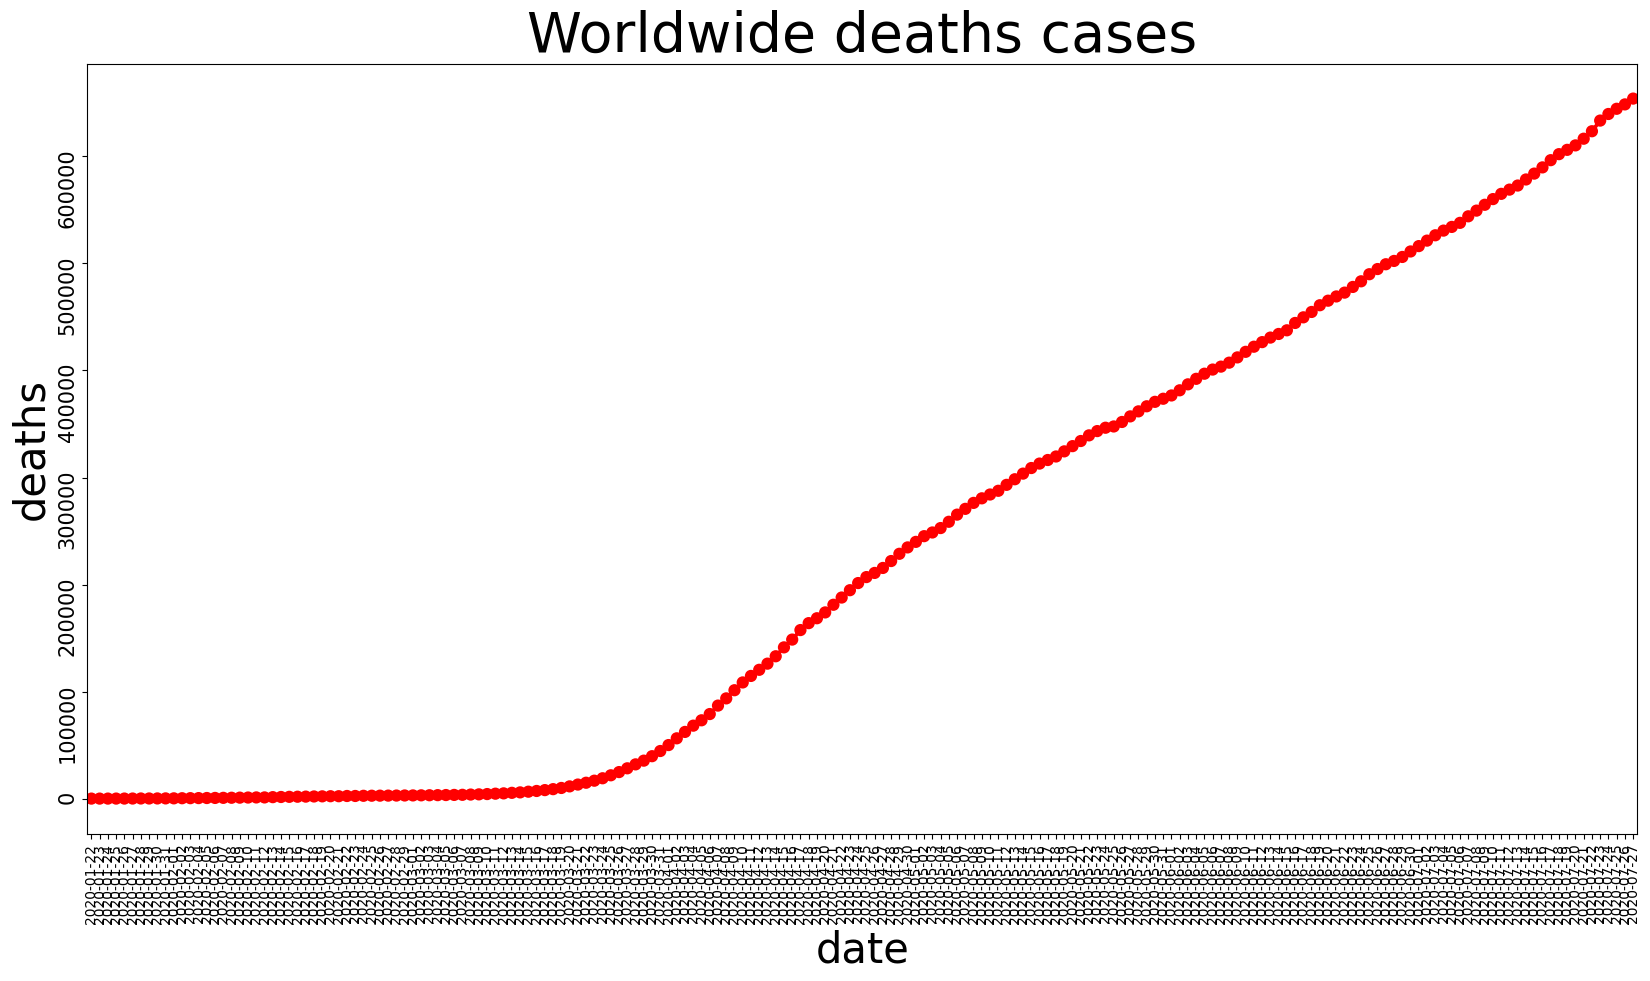

In [ ]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90,fontsize=10)
plt.yticks(rotation=90,fontsize=15)
plt.xlabel('Dates',fontsize=30)
plt.ylabel('Total cases',fontsize=30)
plt.title('Worldwide deaths cases',fontsize=40)
total_cases = df.groupby("date")['date','deaths'].sum().reset_index()
total_cases['date']=pd.to_datetime(total_cases['date'])

x=sns.pointplot(x=total_cases.date.dt.date,y=total_cases.deaths,color='r')
x.set(xlabel="Dates",ylabel="Total cases")

In [3]:
# Top 10 countries with highest active cases in the most recent day

In [ ]:
top_countries=recent_day.groupby("country")['active'].sum().sort_values(ascending=False).head(10).reset_index()
top_countries

,country,active
0,US,2816444
1,Brazil,508116
2,India,495499
3,United Kingdom,254427
4,Russia,201097
5,South Africa,170537
6,Colombia,117163
7,France,108928
8,Canada,107514
9,Peru,98752


[Text(0.5, 0, 'Total cases'), Text(0, 0.5, 'Country')]

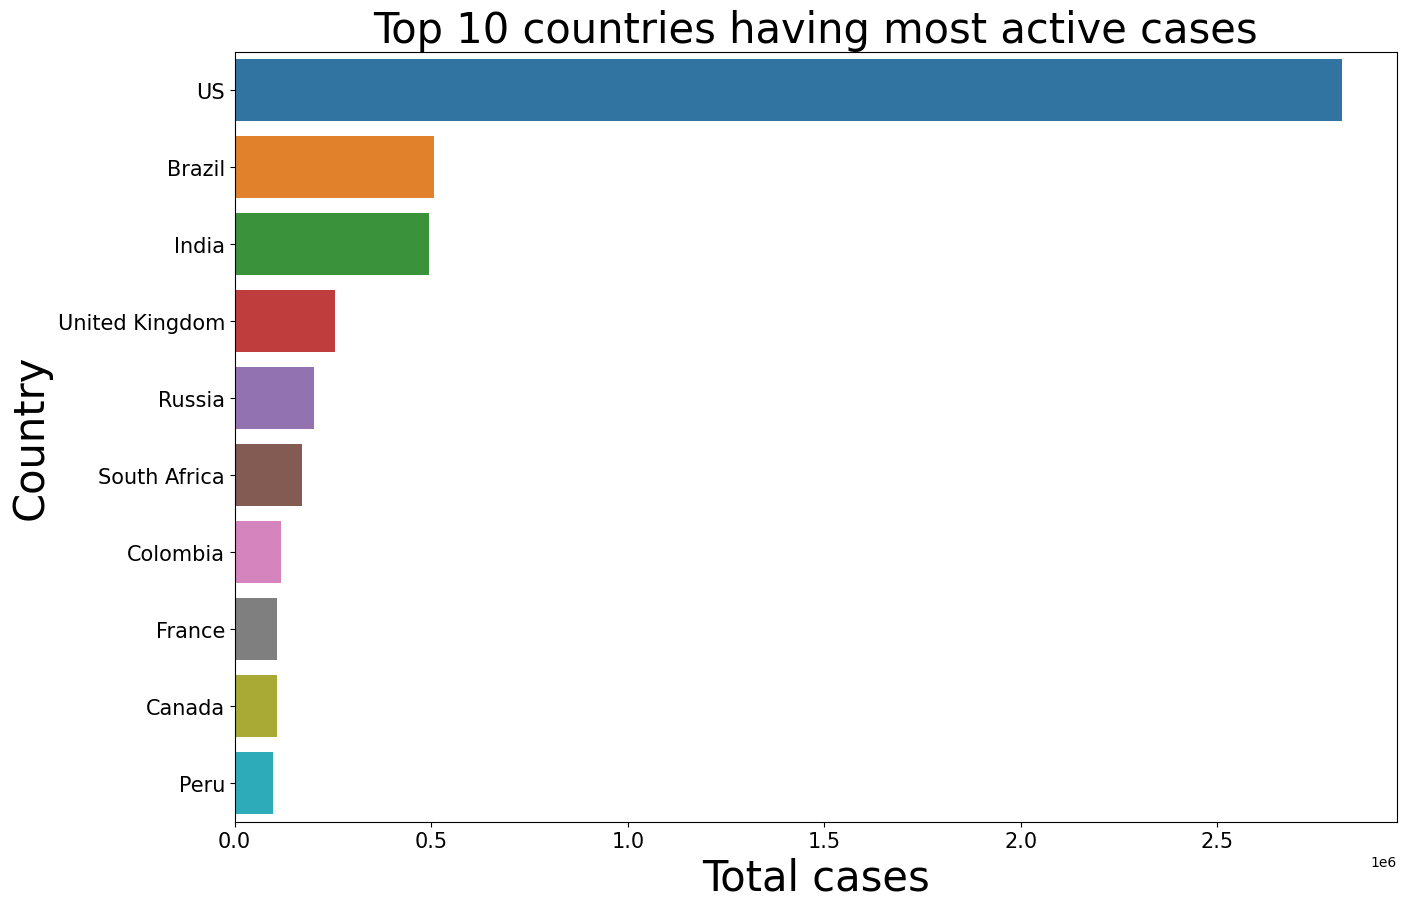

In [ ]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Total cases",fontsize=30)
plt.ylabel("Country",fontsize=30)
plt.title("Top 10 countries having most active cases",fontsize=30)
Y = sns.barplot(x=top_countries.active, y=top_countries.country)
Y.set(xlabel="Total cases",ylabel="Country")

In [ ]:
top_countries=recent_day.groupby("country")['confirmed'].sum().sort_values(ascending=False).head(10).reset_index()
top_countries

,country,confirmed
0,US,4290259
1,Brazil,2442375
2,India,1480073
3,Russia,816680
4,South Africa,452529
5,Mexico,395489
6,Peru,389717
7,Chile,347923
8,United Kingdom,301708
9,Iran,293606


[Text(0.5, 0, 'Total cases'), Text(0, 0.5, 'Country')]

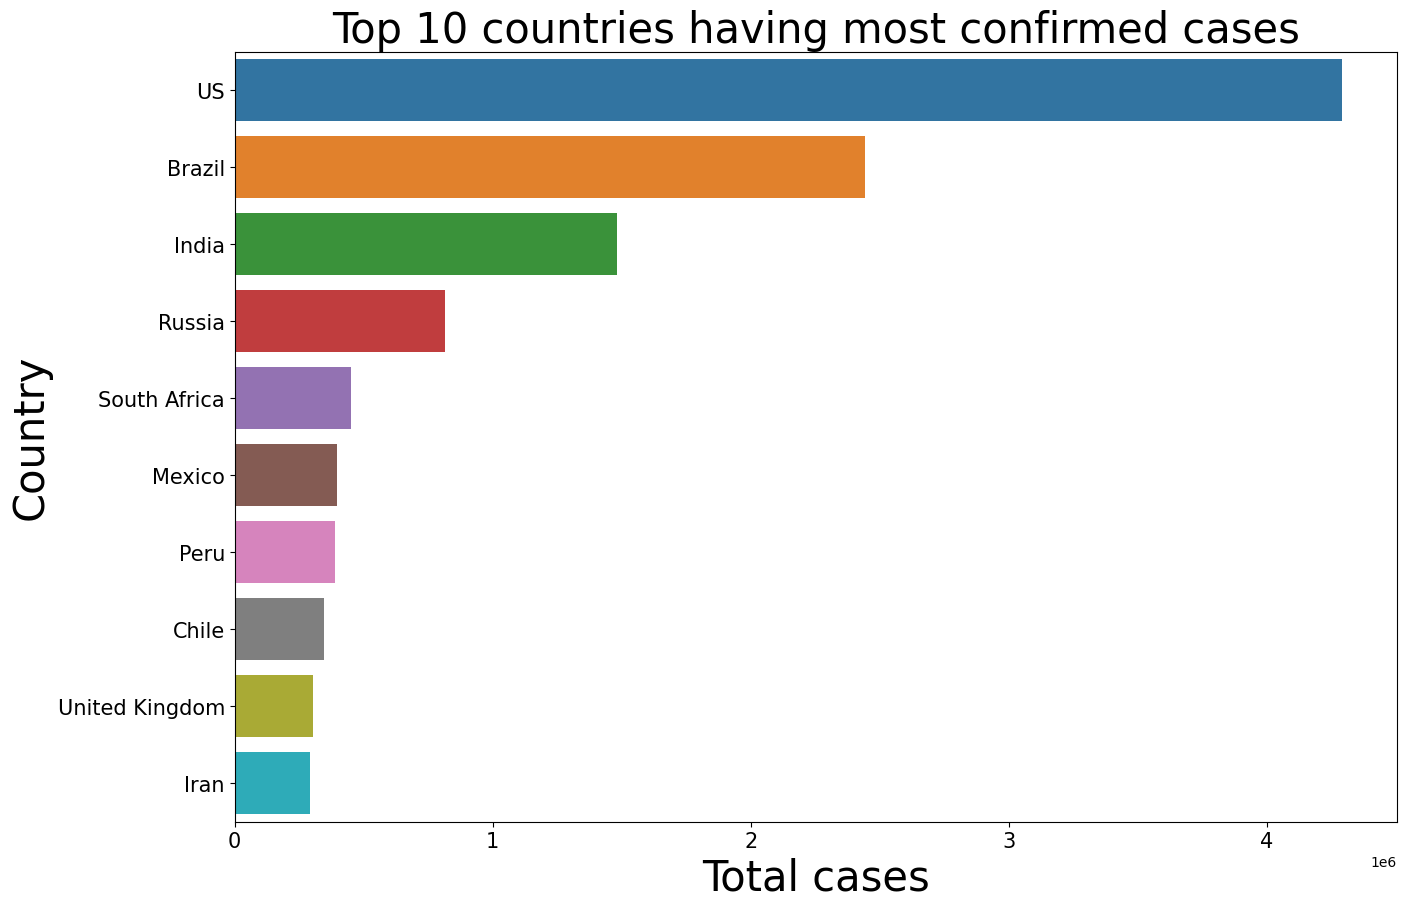

In [ ]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Total cases",fontsize=30)
plt.ylabel("Country",fontsize=30)
plt.title("Top 10 countries having most confirmed cases",fontsize=30)
Y = sns.barplot(x=top_countries.confirmed, y=top_countries.country)
Y.set(xlabel="Total cases",ylabel="Country")

In [ ]:
top_countries=recent_day.groupby("country")['recovered'].sum().sort_values(ascending=False).head(10).reset_index()
top_countries

,country,recovered
0,Brazil,1846641
1,US,1325804
2,India,951166
3,Russia,602249
4,Chile,319954
5,Mexico,303810
6,South Africa,274925
7,Peru,272547
8,Iran,255144
9,Pakistan,241026


[Text(0.5, 0, 'Total cases'), Text(0, 0.5, 'Country')]

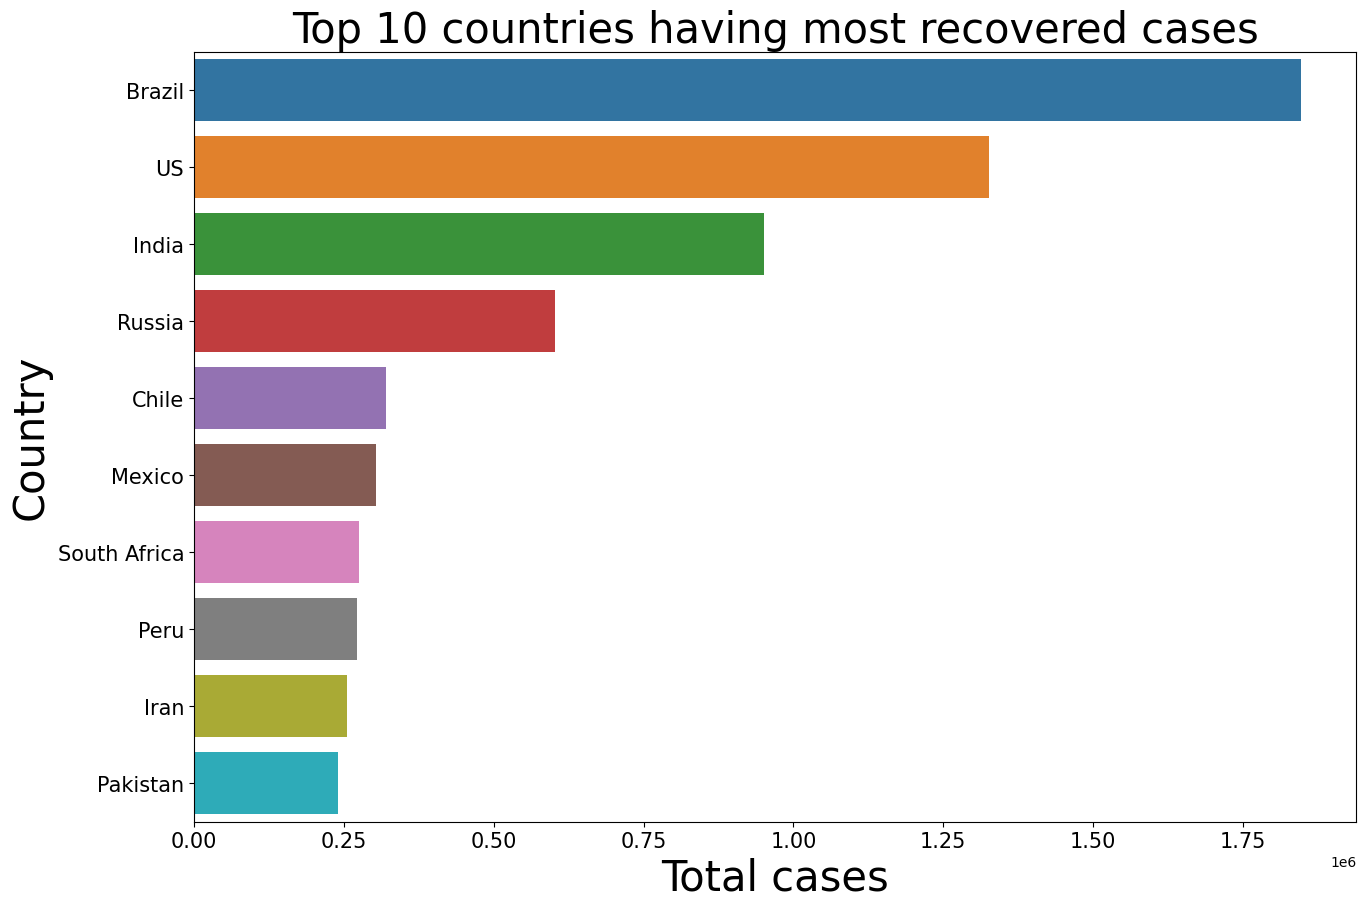

In [ ]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Total cases",fontsize=30)
plt.ylabel("Country",fontsize=30)
plt.title("Top 10 countries having most recovered cases",fontsize=30)
Y = sns.barplot(x=top_countries.recovered, y=top_countries.country)
Y.set(xlabel="Total cases",ylabel="Country")

In [ ]:
top_countries=recent_day.groupby("country")['deaths'].sum().sort_values(ascending=False).head(10).reset_index()
top_countries

,country,deaths
0,US,148011
1,Brazil,87618
2,United Kingdom,45844
3,Mexico,44022
4,Italy,35112
5,India,33408
6,France,30212
7,Spain,28432
8,Peru,18418
9,Iran,15912


[Text(0.5, 0, 'Total cases'), Text(0, 0.5, 'Country')]

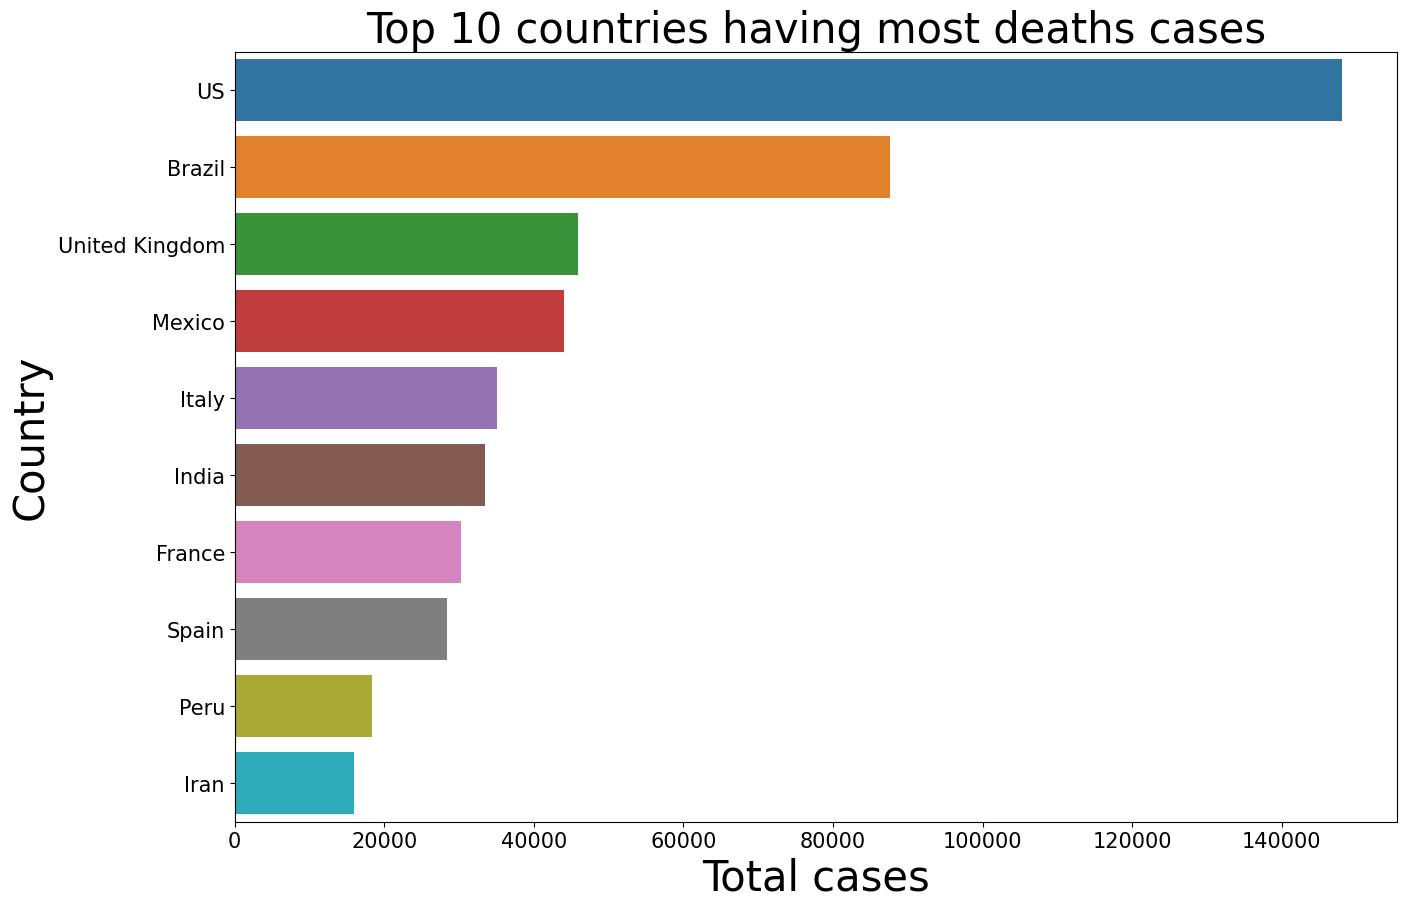

In [ ]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Total cases",fontsize=30)
plt.ylabel("Country",fontsize=30)
plt.title("Top 10 countries having most deaths cases",fontsize=30)
Y = sns.barplot(x=top_countries.deaths, y=top_countries.country)
Y.set(xlabel="Total cases",ylabel="Country")

In [ ]:
brazil=df[df['country']=="Brazil"]
brazil=brazil.groupby('date')['confirmed','recovered','deaths','active'].sum().reset_index()
brazil

<ipython-input-37-9aa15a71683b>:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,date,confirmed,recovered,deaths,active
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
...,...,...,...,...,...
183,2020-07-23,2287475,1620313,84082,583080
184,2020-07-24,2343366,1693214,85238,564914
185,2020-07-25,2394513,1785359,86449,522705
186,2020-07-26,2419091,1812913,87004,519174


In [ ]:
UK=df[df['country']=="United Kingdom"]
UK=UK.groupby('date')['confirmed','recovered','deaths','active'].sum().reset_index()
UK

<ipython-input-38-281d810fa682>:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,date,confirmed,recovered,deaths,active
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
...,...,...,...,...,...
183,2020-07-23,298731,1425,45639,251667
184,2020-07-24,299500,1425,45762,252313
185,2020-07-25,300270,1427,45823,253020
186,2020-07-26,301020,1434,45837,253749


In [ ]:
US=df[df['country']=="US"]
US=US.groupby('date')['confirmed','recovered','deaths','active'].sum().reset_index()
US

<ipython-input-36-9acfe9fefc93>:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,date,confirmed,recovered,deaths,active
0,2020-01-22,1,0,0,1
1,2020-01-23,1,0,0,1
2,2020-01-24,2,0,0,2
3,2020-01-25,2,0,0,2
4,2020-01-26,5,0,0,5
...,...,...,...,...,...
183,2020-07-23,4038816,1233269,144430,2661117
184,2020-07-24,4112531,1261624,145560,2705347
185,2020-07-25,4178970,1279414,146465,2753091
186,2020-07-26,4233923,1297863,146935,2789125


In [ ]:
india=df[df['country']=="India"]
india=india.groupby('date')['confirmed','recovered','deaths','active'].sum().reset_index()
india

<ipython-input-39-f15c7ffbc644>:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,date,confirmed,recovered,deaths,active
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
...,...,...,...,...,...
183,2020-07-23,1288108,817209,30601,440298
184,2020-07-24,1337024,849432,31358,456234
185,2020-07-25,1385635,885573,32060,468002
186,2020-07-26,1435616,917568,32771,485277


In [ ]:
russia=df[df['country']=='Russia']
russia=russia.groupby('date')['confirmed','recovered','deaths','active'].sum().reset_index()
russia

<ipython-input-40-c9db3d174c38>:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,date,confirmed,recovered,deaths,active
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
...,...,...,...,...,...
183,2020-07-23,793720,579295,12873,201552
184,2020-07-24,799499,587728,13026,198745
185,2020-07-25,805332,596064,13172,196096
186,2020-07-26,811073,599172,13249,198652


In [4]:
# lets compare the trend of confirmed cases

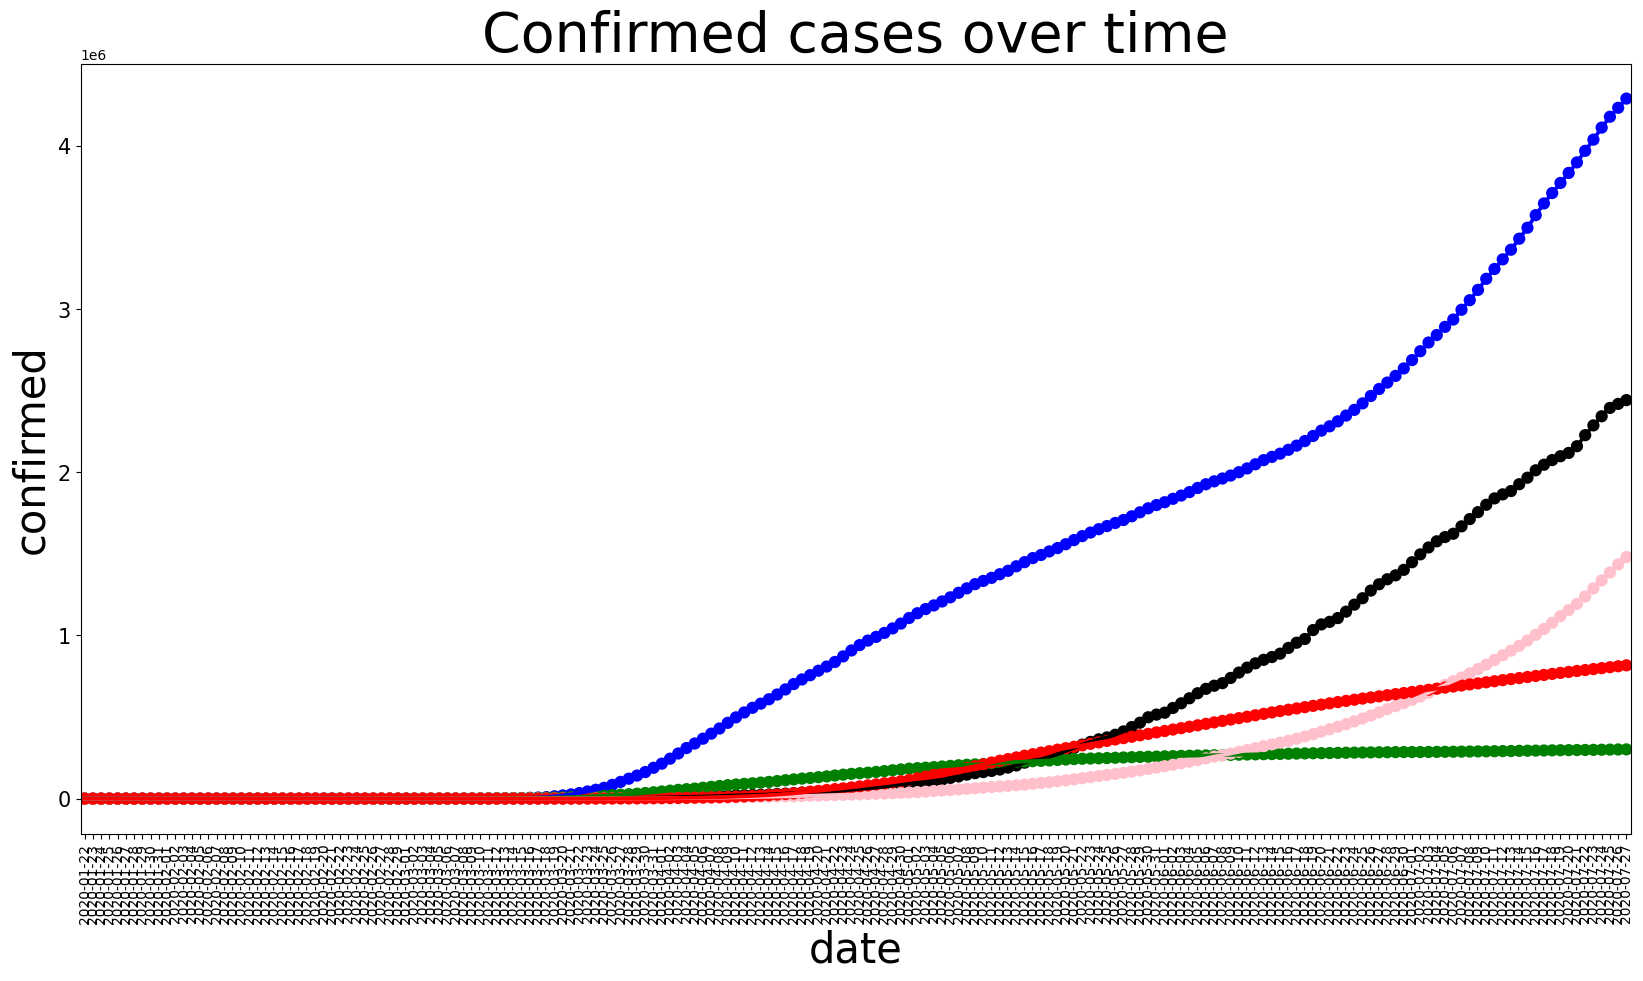

In [ ]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=15)
plt.xlabel('Date',fontsize=30)
plt.ylabel('Confirmed',fontsize=30)
plt.title('Confirmed cases over time',fontsize=40)
sns.pointplot(x=US.date,y=US.confirmed,color='Blue')
sns.pointplot(x=brazil.date,y=brazil.confirmed,color='black')
sns.pointplot(x=UK.date,y=UK.confirmed,color='Green')
sns.pointplot(x=india.date,y=india.confirmed,color='Pink')
sns.pointplot(x=russia.date,y=russia.confirmed,color='Red')
plt.show()

In [5]:
#analysis for death, active,recovered

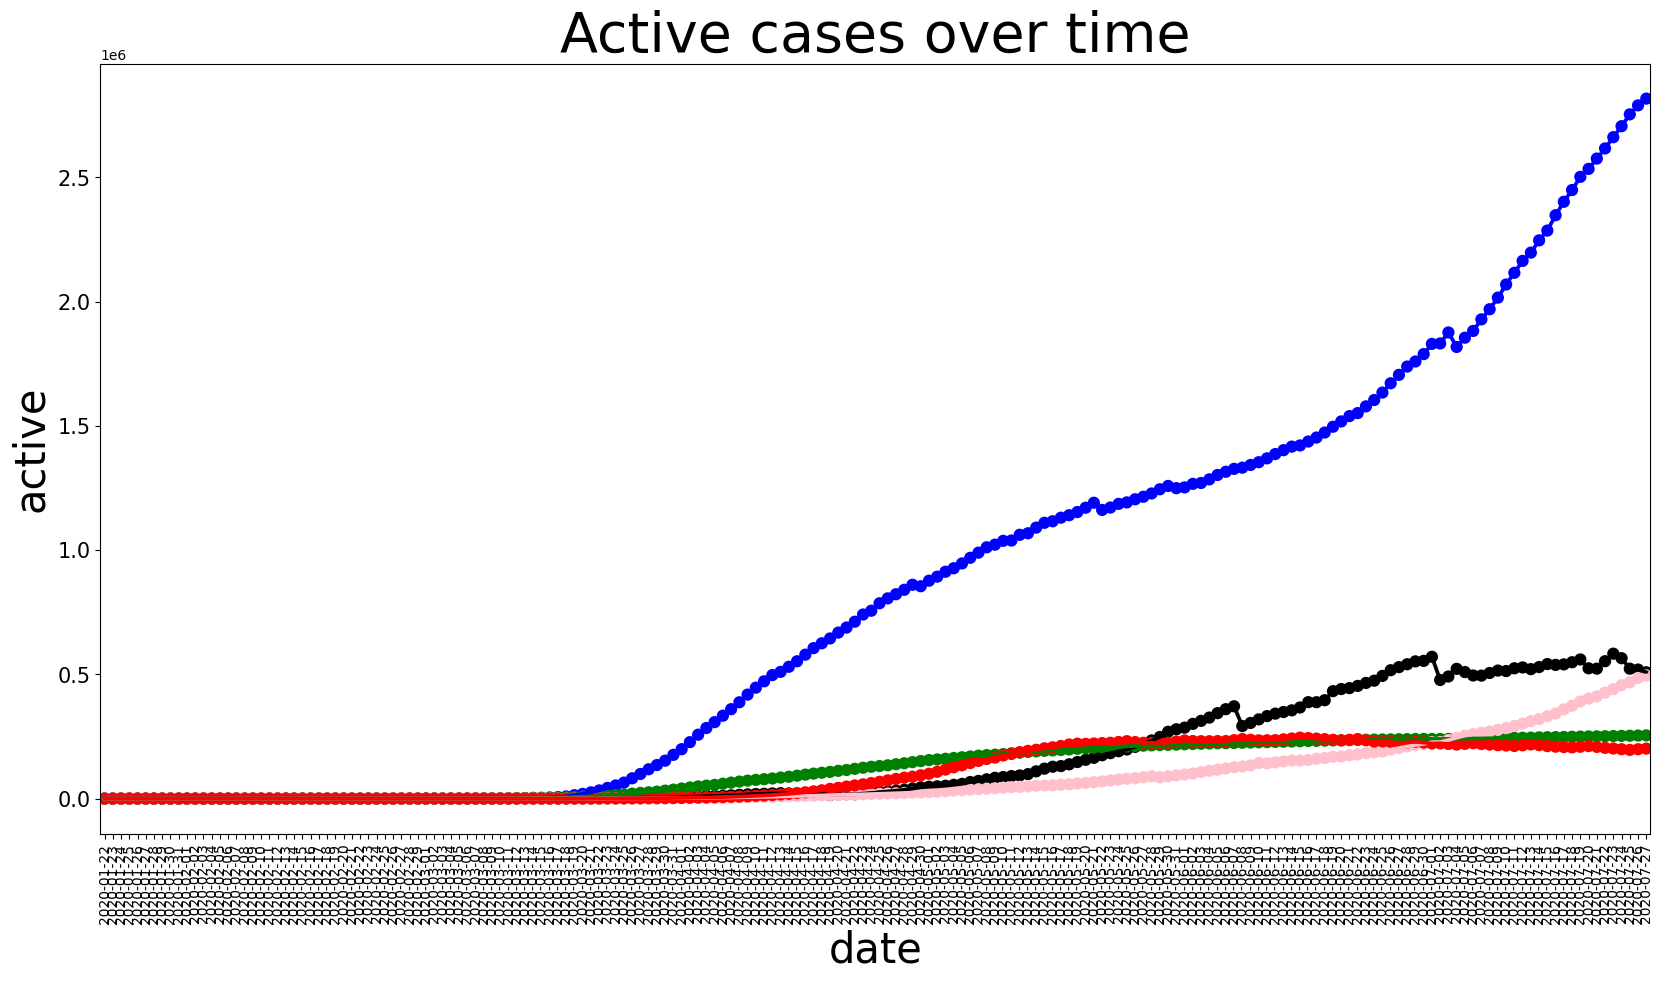

In [ ]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=15)
plt.xlabel('Date',fontsize=30)
plt.ylabel('Active',fontsize=30)
plt.title('Active cases over time',fontsize=40)
sns.pointplot(x=US.date,y=US.active,color='Blue')
sns.pointplot(x=brazil.date,y=brazil.active,color='black')
sns.pointplot(x=UK.date,y=UK.active,color='Green')
sns.pointplot(x=india.date,y=india.active,color='Pink')
sns.pointplot(x=russia.date,y=russia.active,color='Red')
plt.show()

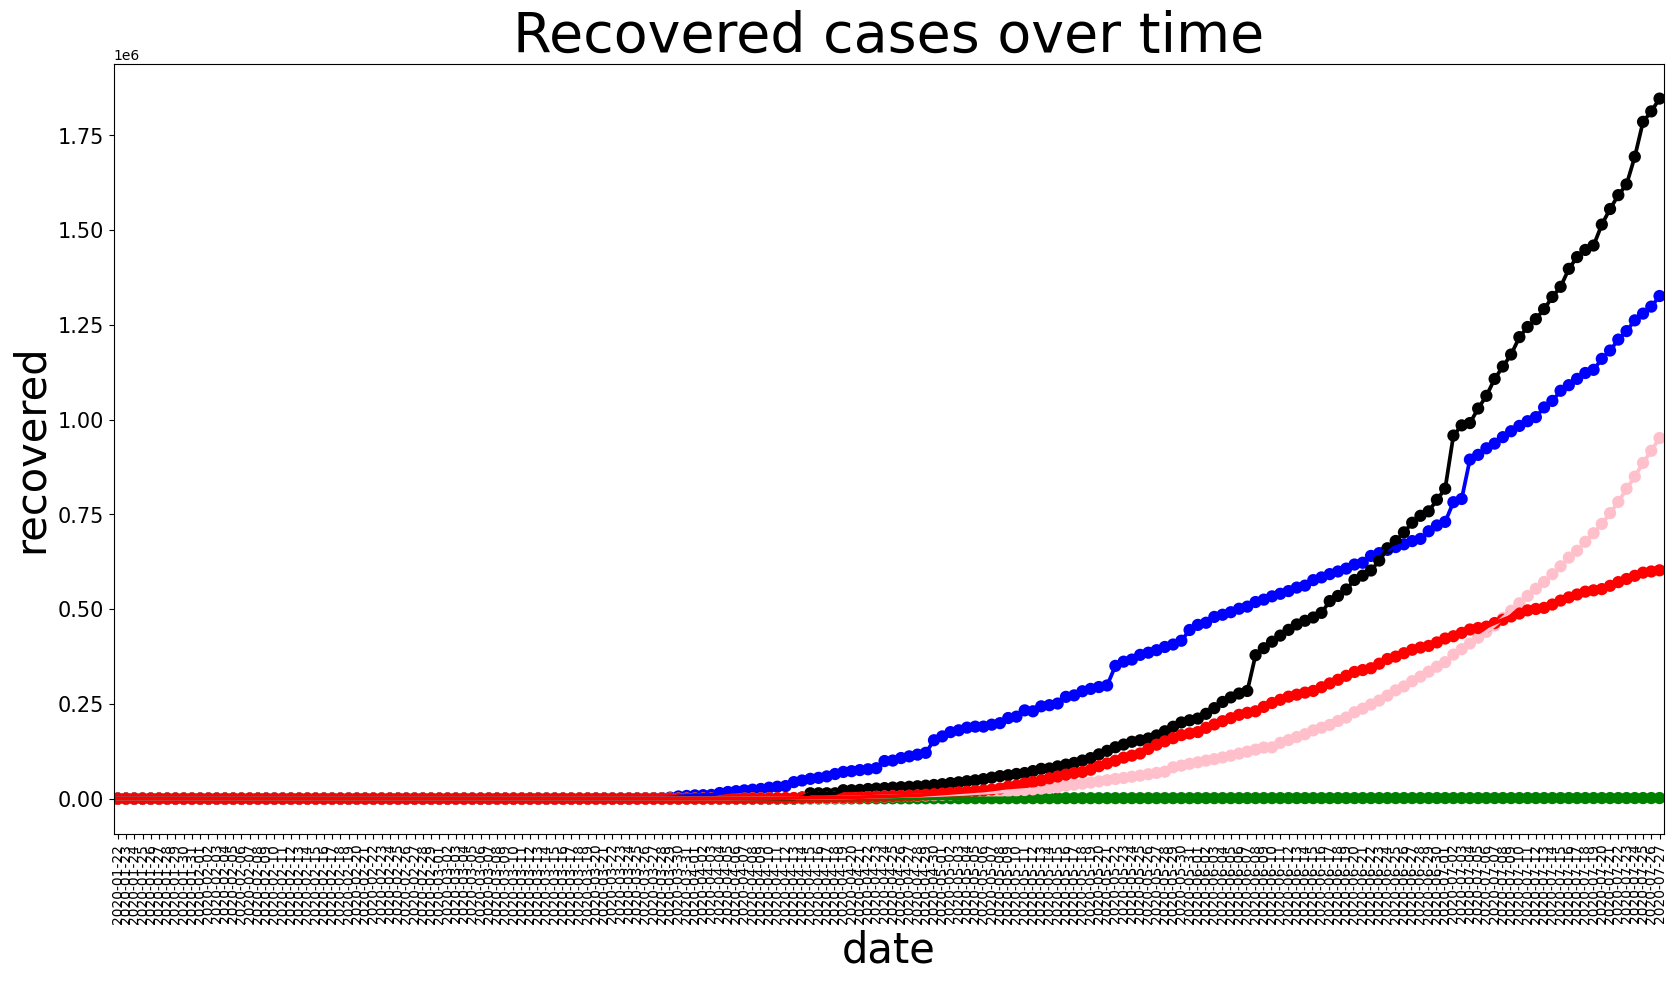

In [ ]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=15)
plt.xlabel('Date',fontsize=30)
plt.ylabel('Recovered',fontsize=30)
plt.title('Recovered cases over time',fontsize=40)
sns.pointplot(x=US.date,y=US.recovered,color='Blue')
sns.pointplot(x=brazil.date,y=brazil.recovered,color='black')
sns.pointplot(x=UK.date,y=UK.recovered,color='Green')
sns.pointplot(x=india.date,y=india.recovered,color='Pink')
sns.pointplot(x=russia.date,y=russia.recovered,color='Red')
plt.show()

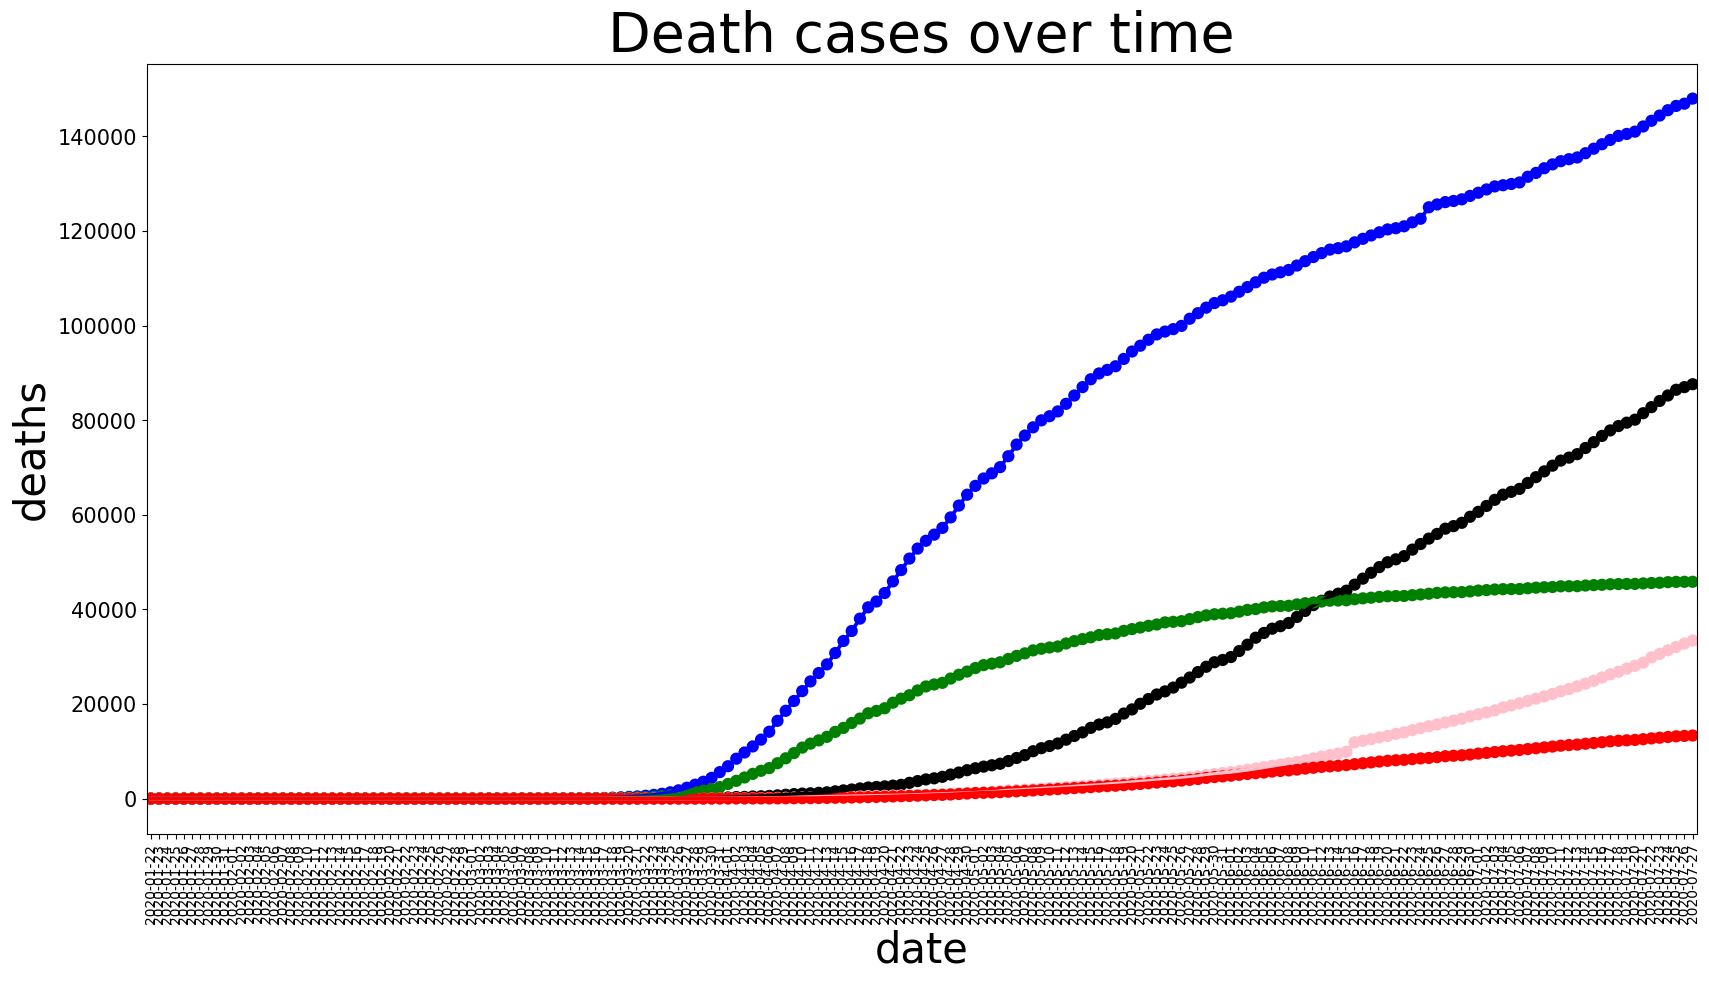

In [ ]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=15)
plt.xlabel('Date',fontsize=30)
plt.ylabel('Deaths',fontsize=30)
plt.title('Death cases over time',fontsize=40)
sns.pointplot(x=US.date,y=US.deaths,color='Blue')
sns.pointplot(x=brazil.date,y=brazil.deaths,color='black')
sns.pointplot(x=UK.date,y=UK.deaths,color='Green')
sns.pointplot(x=india.date,y=india.deaths,color='Pink')
sns.pointplot(x=russia.date,y=russia.deaths,color='Red')
plt.show()

In [ ]:
# With this,we are done with our analysis.

In [6]:
# Forecasting -- fb prophet Algorithm

In [ ]:
!pip install prophet

In [ ]:
from prophet import Prophet

In [ ]:
df  # unchanged data

,state,country,lat,long,date,confirmed,deaths,recovered,Active,WHO Region,active
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,0
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe,0
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa,0
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe,0
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa,0
...,...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa,117
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean,375
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa,19
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe,1147


In [ ]:
# Performing forecasting worldwide. Calculating confirmed, deaths, recovered, active worldwide.
confirmed=df.groupby('date')['confirmed'].sum().reset_index()
recovered=df.groupby('date')['recovered'].sum().reset_index()
deaths=df.groupby('date')['deaths'].sum().reset_index()
active=df.groupby('date')['active'].sum().reset_index()

In [ ]:
confirmed

,date,confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [ ]:
recovered

,date,recovered
0,2020-01-22,28
1,2020-01-23,30
2,2020-01-24,36
3,2020-01-25,39
4,2020-01-26,52
...,...,...
183,2020-07-23,8710969
184,2020-07-24,8939705
185,2020-07-25,9158743
186,2020-07-26,9293464


In [ ]:
deaths

,date,deaths
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56
...,...,...
183,2020-07-23,633506
184,2020-07-24,639650
185,2020-07-25,644517
186,2020-07-26,648621


In [ ]:
active

,date,active
0,2020-01-22,510
1,2020-01-23,606
2,2020-01-24,879
3,2020-01-25,1353
4,2020-01-26,2010
...,...,...
183,2020-07-23,6166006
184,2020-07-24,6212290
185,2020-07-25,6243930
186,2020-07-26,6309711


In [7]:
# forecasting for confirmed cases

# For building a forecasting model using fbProphet library,
# there should be only 2 columns passed
# The column names should always be --> 'ds','y'

In [ ]:
confirmed.rename(columns={'date':'ds','confirmed':'y'},inplace=True)

In [ ]:
confirmed

,ds,y
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [ ]:
model=Prophet(interval_width=0.95)

In [ ]:
model.fit(confirmed)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3t95lb53/59re075z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3t95lb53/9q_qwexz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50388', 'data', 'file=/tmp/tmp3t95lb53/59re075z.json', 'init=/tmp/tmp3t95lb53/9q_qwexz.json', 'output', 'file=/tmp/tmp3t95lb53/prophet_modele89hqqz7/prophet_model-20240118165046.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:50:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:50:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future=model.make_future_dataframe(periods=7)  # period can be altered based on the business requirement

In [ ]:
future.tail(10)

,ds
185,2020-07-25
186,2020-07-26
187,2020-07-27
188,2020-07-28
189,2020-07-29
190,2020-07-30
191,2020-07-31
192,2020-08-01
193,2020-08-02
194,2020-08-03


In [ ]:
forecast=model.predict(future)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-9.613281e+03,-1.777273e+05,1.466632e+05,-9.613281e+03,-9.613281e+03,-11063.561776,-11063.561776,-11063.561776,-11063.561776,-11063.561776,-11063.561776,0.0,0.0,0.0,-2.067684e+04
1,2020-01-23,-6.933404e+03,-1.748040e+05,1.505998e+05,-6.933404e+03,-6.933404e+03,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,0.0,0.0,0.0,-8.050948e+03
2,2020-01-24,-4.253528e+03,-1.595881e+05,1.670083e+05,-4.253528e+03,-4.253528e+03,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,0.0,0.0,0.0,5.827455e+03
3,2020-01-25,-1.573651e+03,-1.465999e+05,1.775942e+05,-1.573651e+03,-1.573651e+03,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,0.0,0.0,0.0,1.217668e+04
4,2020-01-26,1.106226e+03,-1.466413e+05,1.848762e+05,1.106226e+03,1.106226e+03,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,0.0,0.0,0.0,8.405020e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,2020-07-30,1.674503e+07,1.658380e+07,1.690648e+07,1.672107e+07,1.676996e+07,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,0.0,0.0,0.0,1.674391e+07
191,2020-07-31,1.694902e+07,1.679291e+07,1.712183e+07,1.690902e+07,1.698985e+07,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,0.0,0.0,0.0,1.695910e+07
192,2020-08-01,1.715301e+07,1.699737e+07,1.733278e+07,1.709118e+07,1.721161e+07,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,0.0,0.0,0.0,1.716676e+07
193,2020-08-02,1.735700e+07,1.718964e+07,1.754093e+07,1.727722e+07,1.743610e+07,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,0.0,0.0,0.0,1.736430e+07


In [ ]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
188,2020-07-28,1.632020e+07,1.615960e+07,1.649503e+07
189,2020-07-29,1.652997e+07,1.636307e+07,1.668557e+07
190,2020-07-30,1.674391e+07,1.658380e+07,1.690648e+07
191,2020-07-31,1.695910e+07,1.679291e+07,1.712183e+07
192,2020-08-01,1.716676e+07,1.699737e+07,1.733278e+07
193,2020-08-02,1.736430e+07,1.718964e+07,1.754093e+07
194,2020-08-03,1.755889e+07,1.737756e+07,1.773557e+07


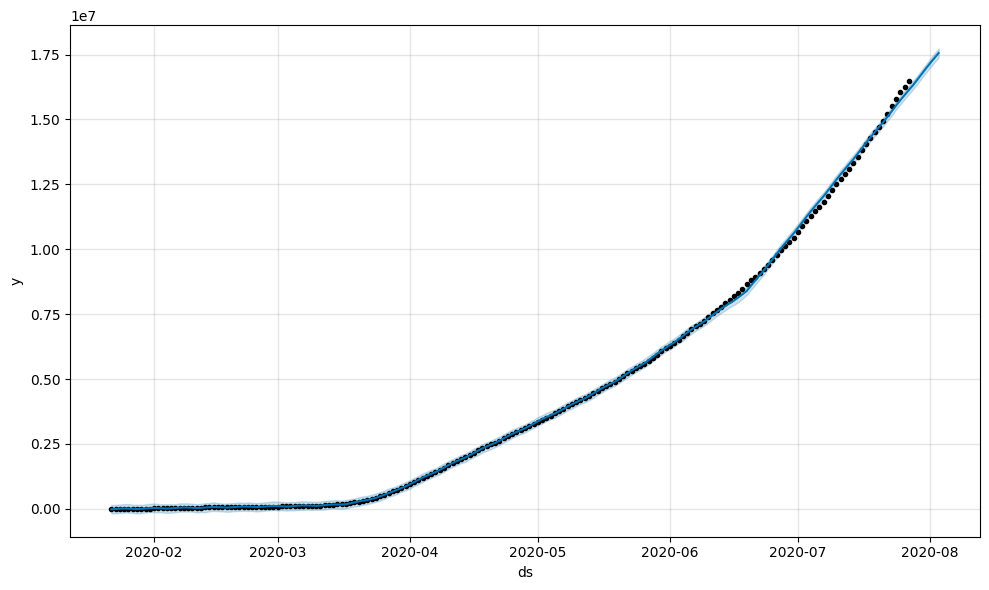

In [ ]:
confirmed_forecast_plot=model.plot(forecast)

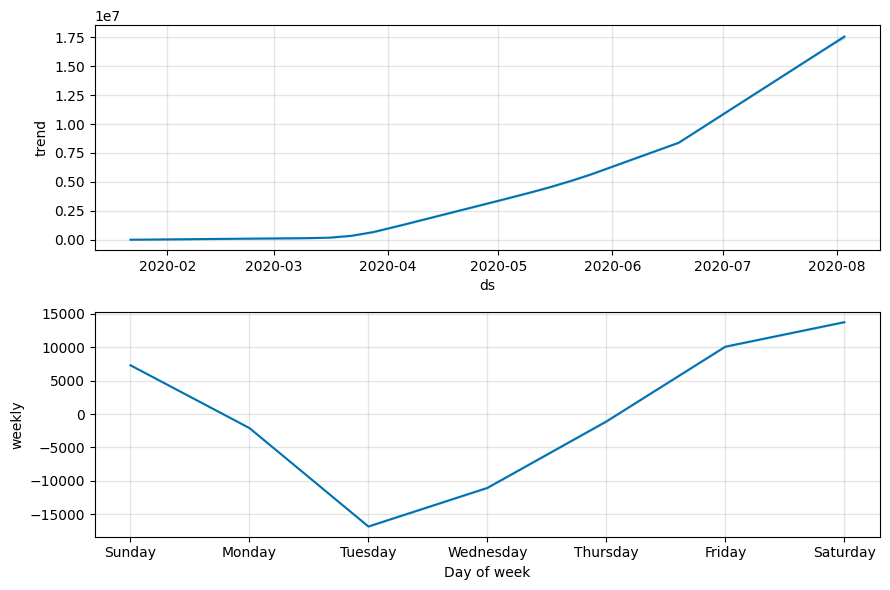

In [ ]:
confirmed_forecast_plot1=model.plot_components(forecast)

In [ ]:
recovered.rename(columns={'date':'ds','recovered':'y'},inplace=True)

In [ ]:
recovered

,ds,y
0,2020-01-22,28
1,2020-01-23,30
2,2020-01-24,36
3,2020-01-25,39
4,2020-01-26,52
...,...,...
183,2020-07-23,8710969
184,2020-07-24,8939705
185,2020-07-25,9158743
186,2020-07-26,9293464


In [ ]:
model1=Prophet(interval_width=0.95)


In [ ]:
model1.fit(recovered)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3t95lb53/fipj4xn6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3t95lb53/wtgt7x8l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83631', 'data', 'file=/tmp/tmp3t95lb53/fipj4xn6.json', 'init=/tmp/tmp3t95lb53/wtgt7x8l.json', 'output', 'file=/tmp/tmp3t95lb53/prophet_modeld6v9fjcl/prophet_model-20240118170259.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:02:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:02:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future=model1.make_future_dataframe(periods=7)


In [ ]:
future.tail(10)

,ds
185,2020-07-25
186,2020-07-26
187,2020-07-27
188,2020-07-28
189,2020-07-29
190,2020-07-30
191,2020-07-31
192,2020-08-01
193,2020-08-02
194,2020-08-03


In [ ]:
forecast = model1.predict(future)
forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
188,2020-07-28,9.311028e+06,9.199546e+06,9.439048e+06
189,2020-07-29,9.453130e+06,9.332266e+06,9.575982e+06
190,2020-07-30,9.595783e+06,9.477187e+06,9.715693e+06
191,2020-07-31,9.737182e+06,9.619054e+06,9.866915e+06
192,2020-08-01,9.877343e+06,9.755681e+06,1.000416e+07
193,2020-08-02,1.000332e+07,9.880398e+06,1.013003e+07
194,2020-08-03,1.013982e+07,1.000697e+07,1.027518e+07


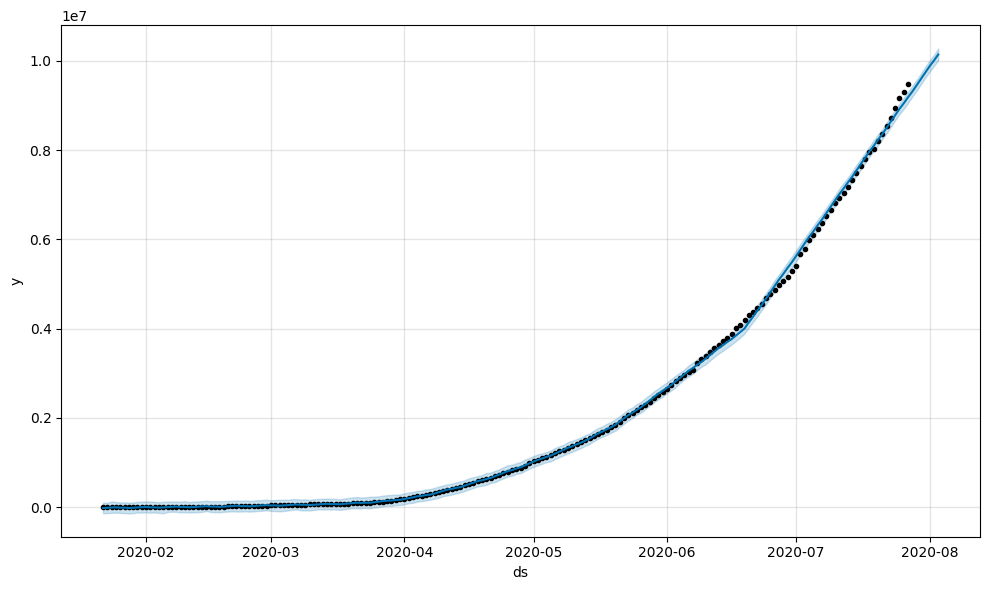

In [ ]:
recovered_forecast_plot = model1.plot(forecast)

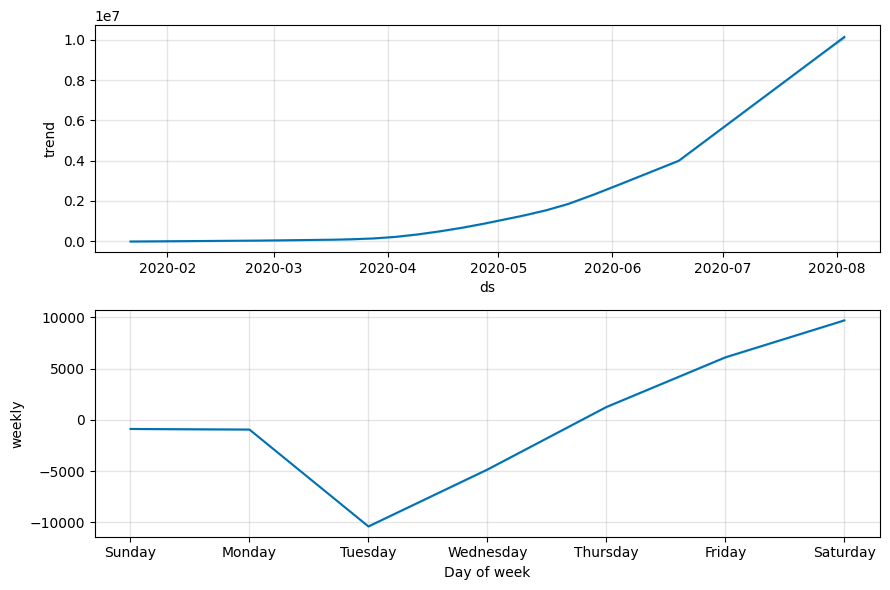

In [ ]:
recovered_forecast_plot1 = model1.plot_components(forecast)

In [ ]:
deaths.rename(columns={'date':'ds','deaths':'y'},inplace=True)

In [ ]:
deaths

,ds,y
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56
...,...,...
183,2020-07-23,633506
184,2020-07-24,639650
185,2020-07-25,644517
186,2020-07-26,648621


In [ ]:
model2=Prophet(interval_width=0.95)


In [ ]:
model2.fit(deaths)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3t95lb53/j0kvdhd2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3t95lb53/rr31ly_d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67872', 'data', 'file=/tmp/tmp3t95lb53/j0kvdhd2.json', 'init=/tmp/tmp3t95lb53/rr31ly_d.json', 'output', 'file=/tmp/tmp3t95lb53/prophet_model28daq17_/prophet_model-20240118172101.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:21:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:21:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future=model2.make_future_dataframe(periods=7)

In [ ]:
forecast = model2.predict(future)
forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
188,2020-07-28,652315.566446,649312.717476,655056.350832
189,2020-07-29,657882.129102,654826.707493,661031.972510
190,2020-07-30,663491.395651,660011.045930,666684.492500
191,2020-07-31,669006.394312,665437.199685,672540.420724
192,2020-08-01,673888.426957,669391.754586,677815.706680
193,2020-08-02,678025.345020,673316.408257,682563.094597
194,2020-08-03,682315.659400,676601.336689,687690.249776


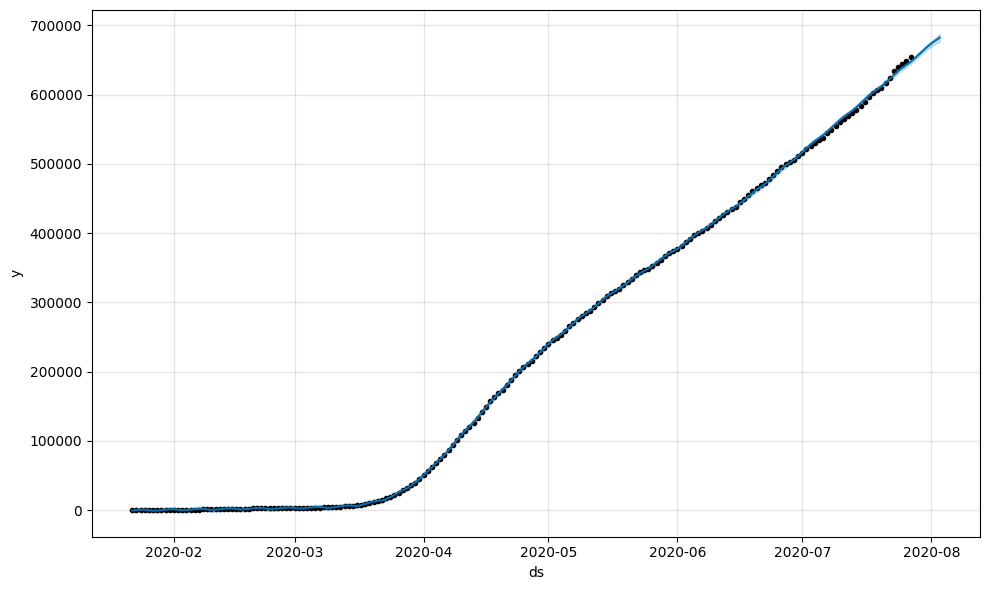

In [ ]:
deaths_forecast_plot = model2.plot(forecast)


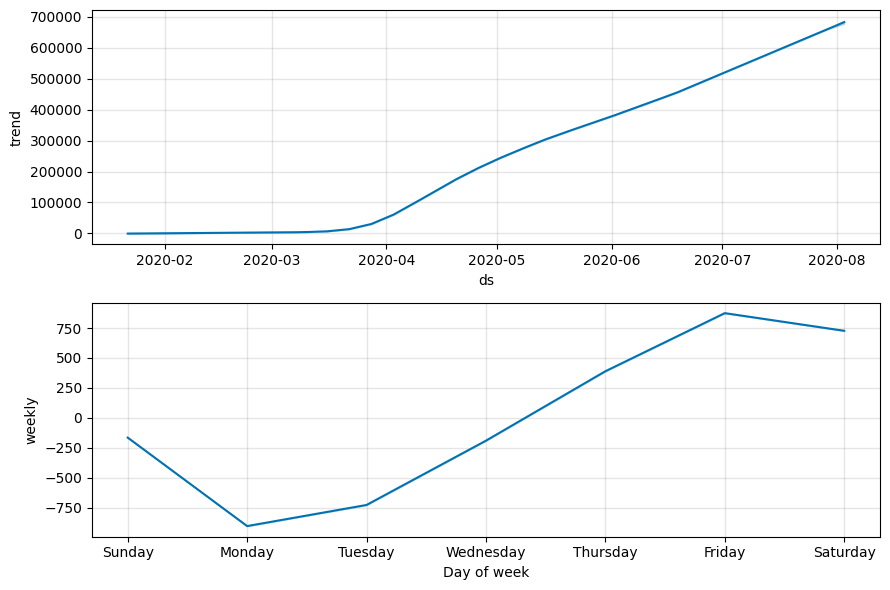

In [ ]:
deaths_forecast_plot1 = model2.plot_components(forecast)


In [ ]:
active.rename(columns={"date":"ds","active":"y"},inplace=True)


In [ ]:
active

,ds,y
0,2020-01-22,510
1,2020-01-23,606
2,2020-01-24,879
3,2020-01-25,1353
4,2020-01-26,2010
...,...,...
183,2020-07-23,6166006
184,2020-07-24,6212290
185,2020-07-25,6243930
186,2020-07-26,6309711


In [ ]:
model3=Prophet(interval_width=0.95)


In [ ]:
model3.fit(active)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3t95lb53/7montvyb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3t95lb53/rbwx2om2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33408', 'data', 'file=/tmp/tmp3t95lb53/7montvyb.json', 'init=/tmp/tmp3t95lb53/rbwx2om2.json', 'output', 'file=/tmp/tmp3t95lb53/prophet_modelc6tygduj/prophet_model-20240118172134.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:21:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:21:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future=model3.make_future_dataframe(periods=7)


In [ ]:
forecast = model3.predict(future)
forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
188,2020-07-28,6.353415e+06,6.286076e+06,6.423986e+06
189,2020-07-29,6.415815e+06,6.344653e+06,6.480878e+06
190,2020-07-30,6.481274e+06,6.406616e+06,6.552209e+06
191,2020-07-31,6.549315e+06,6.474718e+06,6.621436e+06
192,2020-08-01,6.611480e+06,6.542258e+06,6.690685e+06
193,2020-08-02,6.678771e+06,6.599528e+06,6.749977e+06
194,2020-08-03,6.732521e+06,6.645434e+06,6.812658e+06


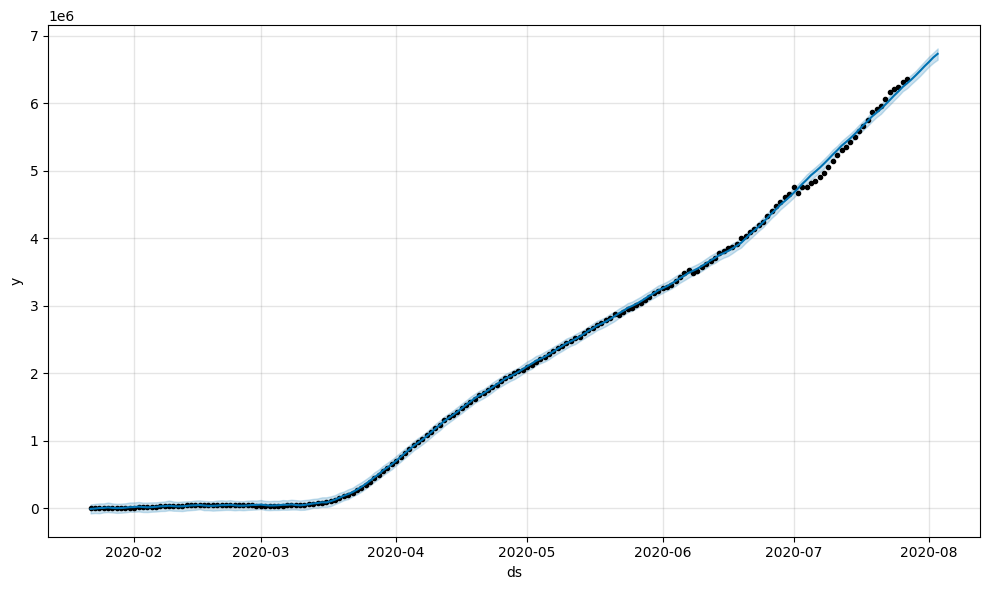

In [ ]:
active_forecast_plot = model3.plot(forecast)


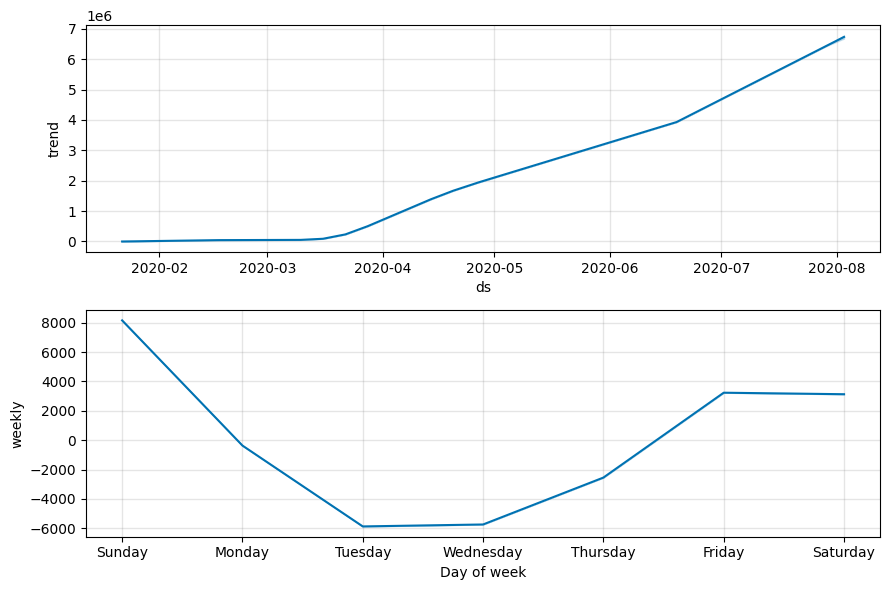

In [ ]:
active_forecast_plot1 = model3.plot_components(forecast)


Forecasting for 7 days have been completed